### Finding the Optimum number of clusters(K) by K-Means Clustering (Unsupervised Learning)  

##### Importing the Modules and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Reading the Excel File from the local storage

In [2]:
df=pd.read_excel("irisdataset.xlsx")
df.head()

,Sepal_length,Sepal_width,petal_length,petal_width,plant
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.3,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Histogram

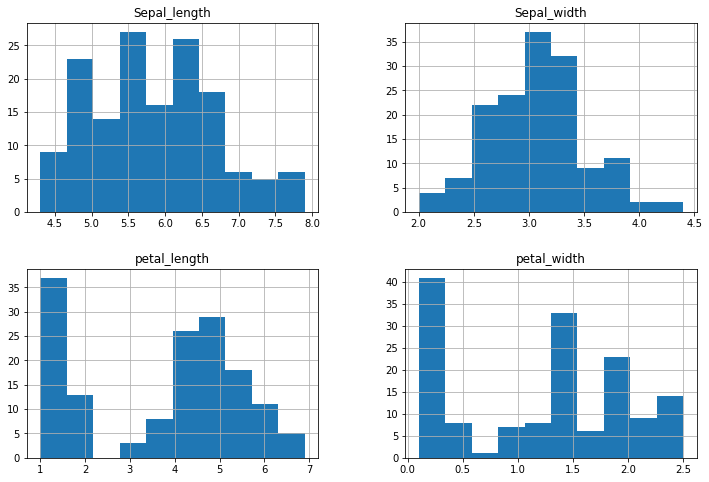

In [3]:
df.hist(figsize =(12,8))
plt.show()

In [4]:
df["plant"]=df["plant"].replace(["Iris-setosa","Iris-versicolor","Iris-virginica"],[0,1,2])

In [5]:
df.head()

,Sepal_length,Sepal_width,petal_length,petal_width,plant
0,5.1,3.5,1.4,0.2,0
1,4.9,3.3,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Dropping the Column 'plant 'and storing that DataFrame into X and then converting it into numpy array

In [6]:
X=df.drop(columns="plant")
X=X.to_numpy()
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.3, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

##### Importing the module Kmeans for finding the number of clusters

In [7]:
from sklearn.cluster import KMeans
wcss=[]

##### Elbow Method to find the optimum number of clusters (K)

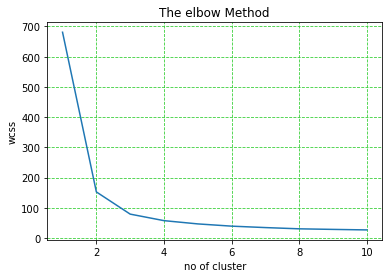

In [8]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow Method")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.grid(True, color = 'limegreen', linestyle = '--')
plt.show()

From the above graph it is seen that the optimum number of clusters approximately 3.

Let's check how closer the algorithm predicts the values with no. of clusters=3

In [9]:
kmeans=KMeans(n_clusters=3)
y_kmeans=kmeans.fit_predict(X)

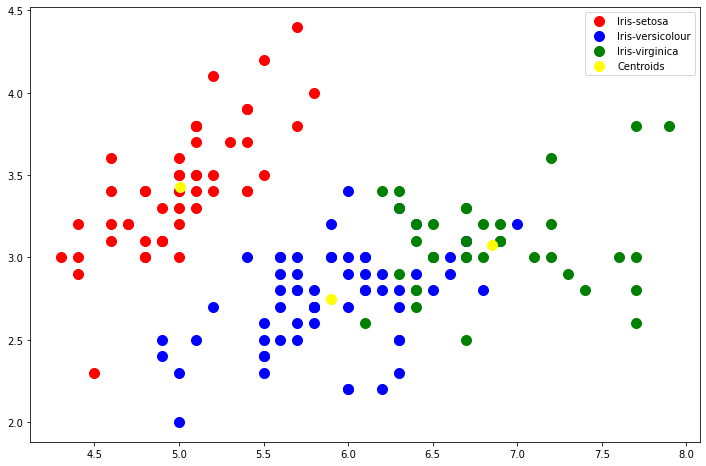

In [10]:
plt.figure(figsize = (12,8))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

##### Accuracy Score

In [11]:
pd.set_option("display.max_rows",None,"display.max_columns",None)

In [12]:
y_actual=df["plant"]
y_actual=y_actual.to_numpy()

In [13]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_actual,y_kmeans)
acc

0.8933333333333333

Here we get an Accuracy Score of 89.3% by using this K-means clustering algorithm

##### Comparing the dataset with the actual and predicted

In [16]:
#converting the y_actual numpy array into pandas DataFrame
actual=pd.DataFrame(y_actual,columns=["Actual"])

#converting the y_kmeans numpy array into pandas DataFrame
predict=pd.DataFrame(y_kmeans,columns=["Predicted"])

#replacing the Zeros and Ones with the original class names as before
actual["Actual"]=actual["Actual"].replace([0,1,2],["Iris-setosa","Iris-versicolor","Iris-virginica"])
predict["Predicted"]=predict["Predicted"].replace([0,1,2],["Iris-setosa","Iris-versicolor","Iris-virginica"])

#concatenating the actual and predicted dataframes together
compare=pd.concat([actual,predict],axis=1)
compare

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa
